### Customer Analytics

Analyze a dataset containing customer information. Use EDA techniques to explore the data, identify trends, and create visualizations that show customer demographics, purchasing patterns, and correlations between variables.

In [2]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Unzip the file
with zipfile.ZipFile('Customer Data.zip', 'r') as zip_ref:
    zip_ref.extractall('Customer_Data')

# Step 2: List all the files in the extracted folder
file_list = os.listdir('Customer_Data')
file_list

['portfolio.csv', 'profile.csv', 'transcript.csv']

In [3]:
# Load each CSV file into a DataFrame
portfolio = pd.read_csv('Customer_Data/portfolio.csv')
profile = pd.read_csv('Customer_Data/profile.csv')
transcript = pd.read_csv('Customer_Data/transcript.csv')

# List to hold the dataframes for easy reference
dfs = {'portfolio': portfolio, 'profile': profile, 'transcript': transcript}

# Iterate over each dataframe to explore the data
for name, df in dfs.items():
    print(f"\nExploring the {name} dataset:\n")
    
    # Check the basic information and data types of each column
    print("\nData Types and Non-Null Counts:\n")
    print(df.info())

    # Check for missing values
    print("\nMissing Values:\n")
    print(df.isnull().sum())

    # View basic statistics of numerical columns
    print("\nSummary Statistics for Numerical Columns:\n")
    print(df.describe())

    # Display unique values in categorical columns
    categorical_columns = df.select_dtypes(include='object').columns
    for col in categorical_columns:
        print(f"\nUnique values in '{col}':")
        print(df[col].unique())

    # Check for duplicate rows
    duplicates = df[df.duplicated()]
    print(f"\nNumber of duplicate rows in {name}: {len(duplicates)}")

    # Print a separator for readability
    print("\n" + "-" * 50)


Exploring the portfolio dataset:


Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes
None

Missing Values:

Unnamed: 0    0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

Summary Statistics for Numerical Columns:

       Unnamed: 0     reward  difficulty   duration
count    10.00000  10.000000   10.000000  10.000000
mean      4.50000   4.200000    7.700000   6.500000
std       3.02765   3.583915    5.831905   2.321398
min       0.000

In [5]:
# Clean Data

In [8]:
# Portfolio

# Drop 'Unnamed: 0' column
portfolio.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'channels' from string representation of list to actual list
import ast
portfolio['channels'] = portfolio['channels'].apply(ast.literal_eval)

# One-hot encode the 'channels' column
channels_dummies = portfolio['channels'].str.join('|').str.get_dummies()
portfolio = pd.concat([portfolio, channels_dummies], axis=1)

# Drop 'channels' after one-hot encoding
portfolio.drop(columns=['channels'], inplace=True)

# View cleaned portfolio data
print(portfolio.head())


   reward  difficulty  duration     offer_type  \
0      10          10         7           bogo   
1      10          10         5           bogo   
2       0           0         4  informational   
3       5           5         7           bogo   
4       5          20        10       discount   

                                 id  email  mobile  social  web  
0  ae264e3637204a6fb9bb56bc8210ddfd      1       1       1    0  
1  4d5c57ea9a6940dd891ad53e9dbe8da0      1       1       1    1  
2  3f207df678b143eea3cee63160fa8bed      1       1       0    1  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9      1       1       0    1  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7      1       0       0    1  


In [10]:
# Profile
# Drop 'Unnamed: 0' column
profile.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'became_member_on' to datetime format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# Fill missing values for 'gender' with 'Unknown'
profile['gender'].fillna('Unknown', inplace=True)

# Fill missing values for 'income' with median
profile['income'].fillna(profile['income'].median(), inplace=True)

# View cleaned profile data
print(profile.head())


    gender  age                                id became_member_on    income
0  Unknown  118  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12   64000.0
1        F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0
2  Unknown  118  38fe809add3b4fcf9315a9694bb96ff5       2018-07-12   64000.0
3        F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09  100000.0
4  Unknown  118  a03223e636434f42ac4c3df47e8bac43       2017-08-04   64000.0


In [12]:
# Transcript

# Drop 'Unnamed: 0' column
transcript.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'value' column from dictionary-like string to actual dictionary and expand into separate columns
transcript['value'] = transcript['value'].apply(ast.literal_eval)
value_df = pd.json_normalize(transcript['value'])
transcript = pd.concat([transcript.drop(columns=['value']), value_df], axis=1)

# View cleaned transcript data
print(transcript.head())

                             person           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4  68617ca6246f4fbc85e91a2a49552598  offer received     0   

                           offer id  amount offer_id  reward  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN      NaN     NaN  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN      NaN     NaN  
2  2906b810c7d4411798c6938adc9daaa5     NaN      NaN     NaN  
3  fafdcd668e3743c1bb461111dcafc2a4     NaN      NaN     NaN  
4  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN      NaN     NaN  


C:\Users\milto\AppData\Local\Temp\ipykernel_24108\3478309849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=profile, x='gender', palette='viridis')


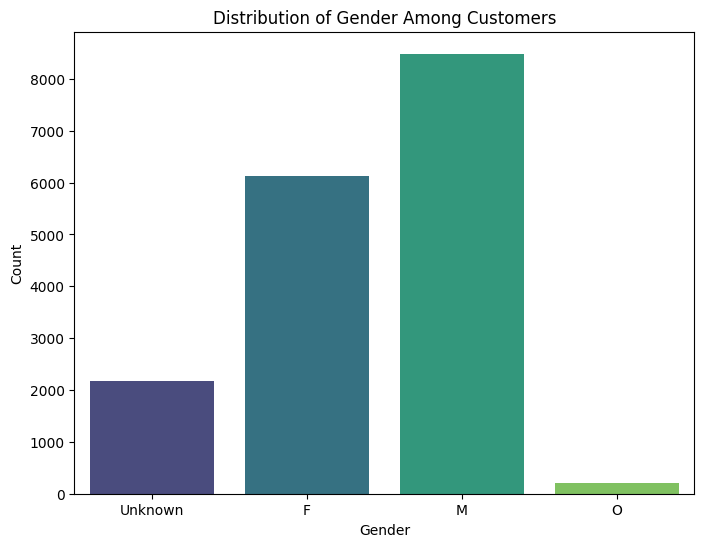

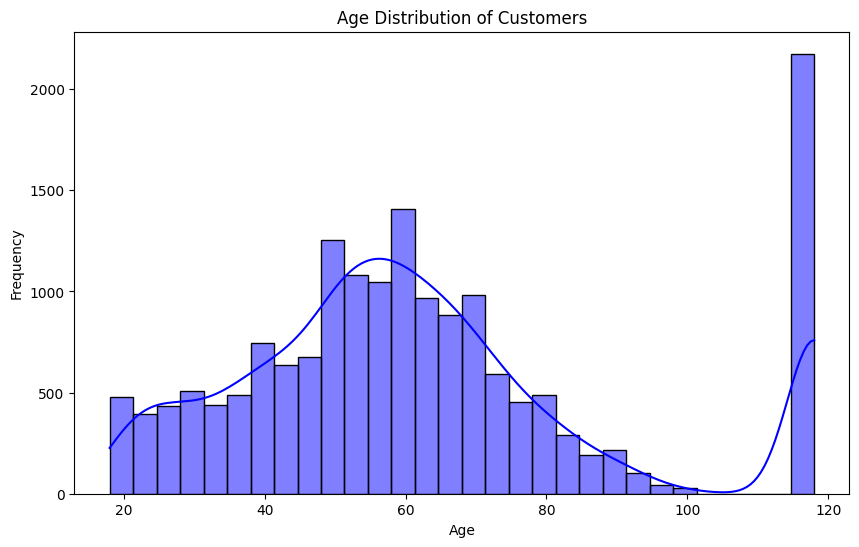

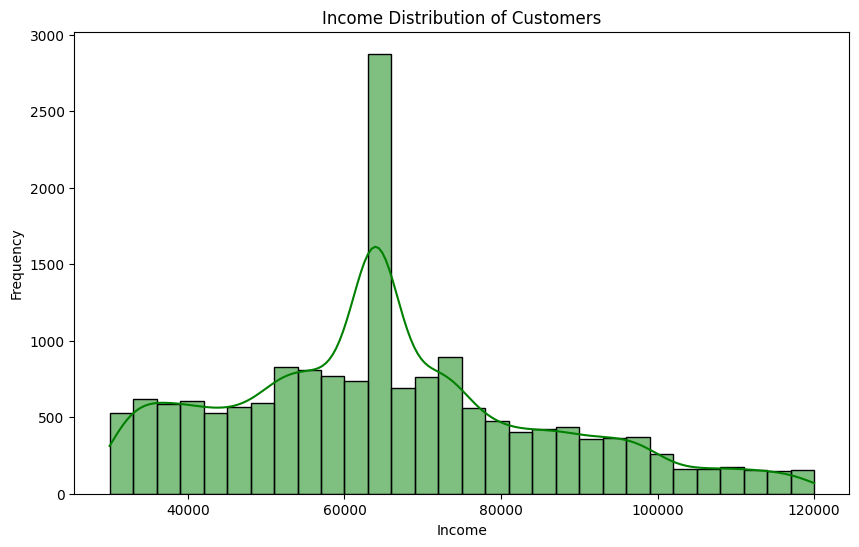

C:\Users\milto\AppData\Local\Temp\ipykernel_24108\3478309849.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcript_transactions['time_days'] = transcript_transactions['time'] / 24  # Converting time to days


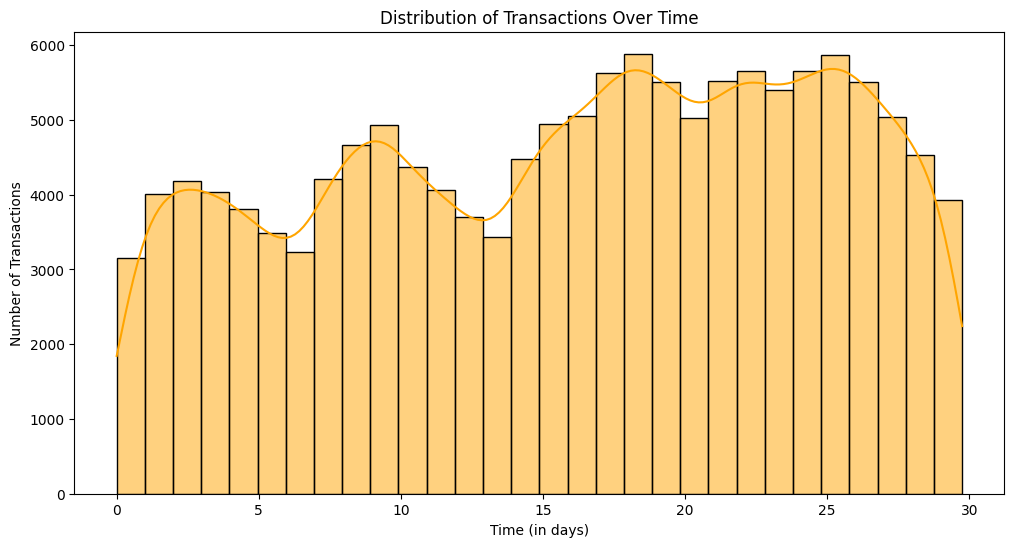

C:\Users\milto\AppData\Local\Temp\ipykernel_24108\3478309849.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=offer_events, x='event', palette='coolwarm')


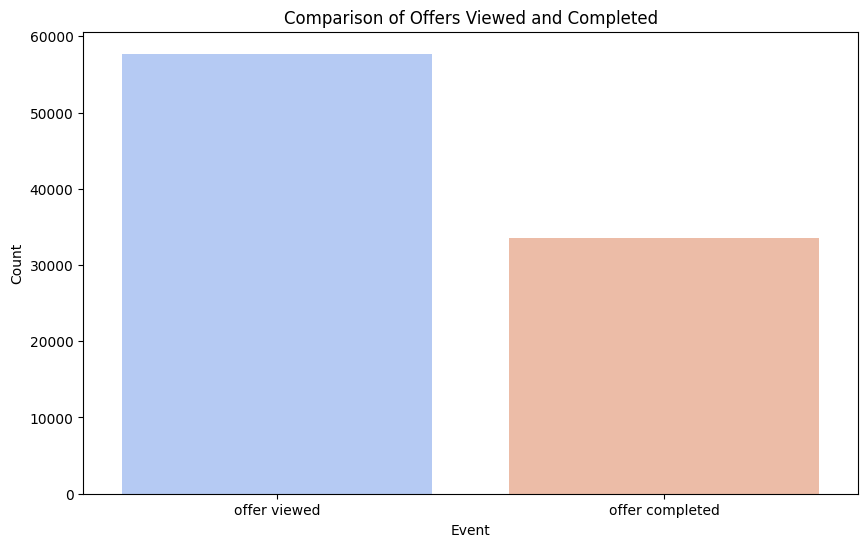

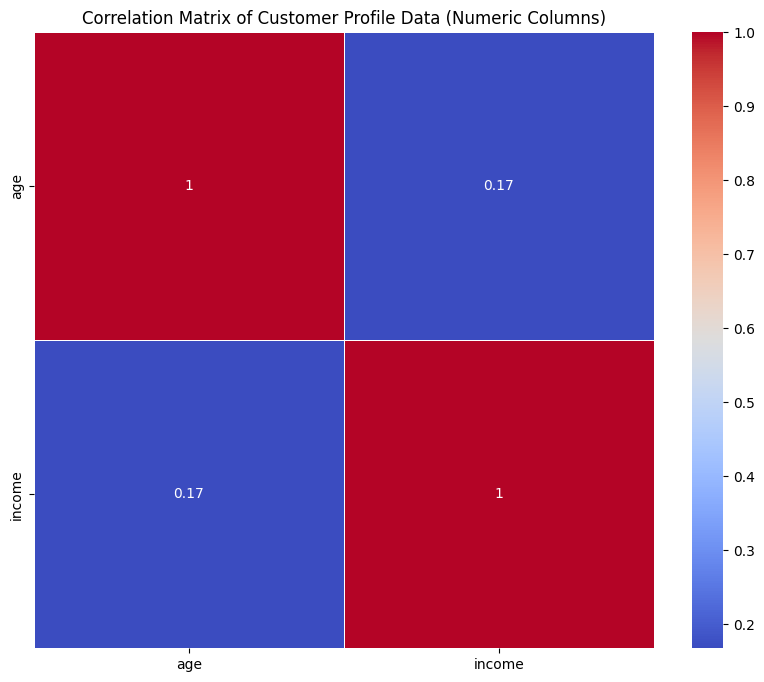

In [13]:
# Visualization

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=profile, x='gender', palette='viridis')
plt.title('Distribution of Gender Among Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=profile, x='age', bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=profile, x='income', bins=30, kde=True, color='green')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Step 2: Purchasing Patterns Analysis

# Transaction Analysis by Time
transcript_transactions = transcript[transcript['event'] == 'transaction']
transcript_transactions['time_days'] = transcript_transactions['time'] / 24  # Converting time to days
plt.figure(figsize=(12, 6))
sns.histplot(data=transcript_transactions, x='time_days', bins=30, kde=True, color='orange')
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Time (in days)')
plt.ylabel('Number of Transactions')
plt.show()

# Offer Viewed vs Offer Completed
offer_events = transcript[transcript['event'].isin(['offer viewed', 'offer completed'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=offer_events, x='event', palette='coolwarm')
plt.title('Comparison of Offers Viewed and Completed')
plt.xlabel('Event')
plt.ylabel('Count')
plt.show()

# Step 3: Correlations Between Variables (Revised Heatmap)

# Select only numeric columns for correlation analysis
profile_numeric = profile.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap (for Profile Dataset)
plt.figure(figsize=(10, 8))
sns.heatmap(profile_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Customer Profile Data (Numeric Columns)')
plt.show()